***Author: Koukolis Evangelos (ekoukol@csd.auth.gr) <br/>
A.E.M.: 141 <br/>
MSc Program in Artificial Intelligence*** <br/>
(modified the nb created by Author: Vasileios Kochliaridis)

# Ex1. Logistic Regression

# Import Libraries

In [1]:
# import ...


# Here we import the libraries we will use
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load Dataset to DataFrame

First, I uploaded the csv file:

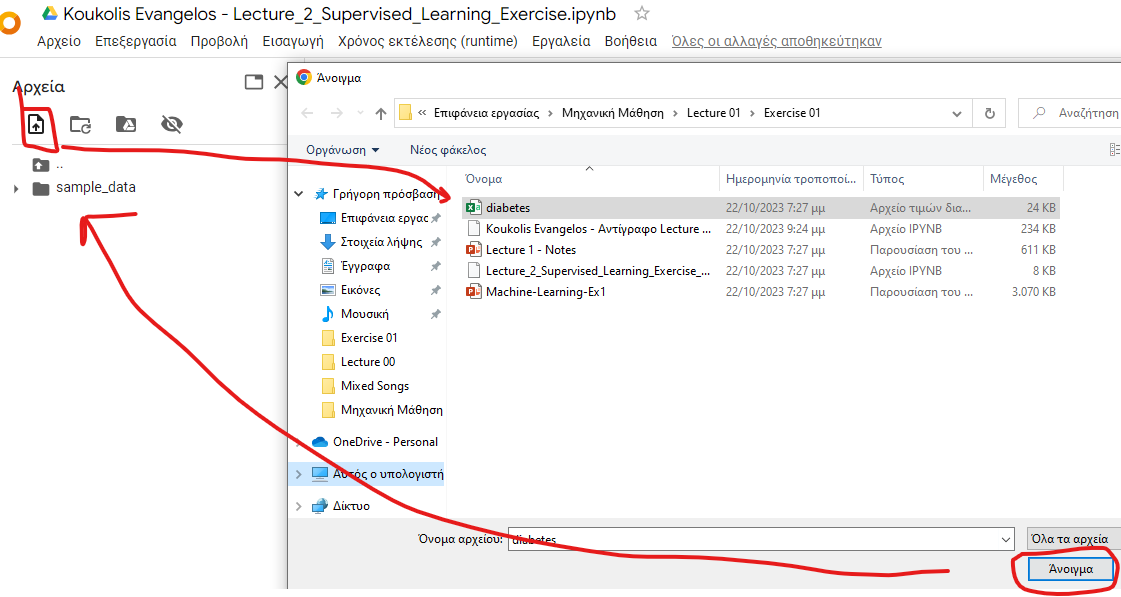

In [2]:
# df = pd.read_csv(...)


df = pd.read_csv('diabetes.csv') # Here, we load the dataset, and save it in df
df # Here, we show the dataset visually

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Convert DataFrame to x (inputs), y (targets) arrays

In [3]:
# input_columns = [..., ..., ...]
# target_column = '...'

# x = df[input_columns].to_numpy()
# y = df[target_column].to_numpy()


# We will use the helpful variables 1) input_columns and 2) target_column, to help us keep track of 1) the features xi 2) The target variable y
input_columns = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age'
]
target_column = 'Outcome'

# We will now create the variables to hold the values:
# for all features (x)
# for the target variable (y)
# Note that we have converted to numpy array using the command pandas.DataFrame.to_numpy
print('type of df[input_columns] is: ', type(df[input_columns]))
x = df[input_columns].to_numpy()
y = df[target_column].to_numpy()
print('type of x is: ', type(x))

type of df[input_columns] is:  <class 'pandas.core.frame.DataFrame'>
type of x is:  <class 'numpy.ndarray'>


# Split Dataset to Train-Test

In [4]:
# random_state = ...
# test_ratio = ...

# x_train, x_test, y_train, y_test = split_train_test(...)


# Here we split our dataset into train set and test set
# It was asked that we
random_state = 0 # This is set to 0, as was required in the assignment (this way, we get the same results every time)
test_ratio = 0.3 # In the assignment, we wanted to do a train-test split of 70 train - 30 test
# The command train_test_split of sklearn is used to is used to conduct the dataset split. If I understood corectly, the command split_train_test(...) that was referenced above, is the equivalent one, but in language R
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_ratio, random_state = random_state)

# Create a Logistic Regression Model

In [5]:
# regularization = ...
# random_state = ...

# classifier = LogisticRegression(...)


# Here, we create the model/classifier using logistic regression. We use various parameters:
regularization = 'l2' # This is the value we use for the penalty parameter. I have used l2 regularization
random_state = 0 # This is the value we use for the random_state parameter. I have used 0 to have the same results every time.
# Should be noted that this seed is only used when solver == ‘sag’, ‘saga’ or ‘liblinear’ to shuffle the data (quoting the page https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
solver = 'lbfgs' # This is the solving algorithm used. Not all solvers support all regularization types
max_iter = 150 # The process stops if convergence is achieved, or if it has executed iterations equal to max_iter
classifier = LogisticRegression(penalty = regularization, random_state = random_state, solver = solver, max_iter = max_iter)
# LogisticRegression failed to converge with 'lbfgs' for the default max_iter iterations, so I used a custom value greather than the default

# Train Model

In [6]:
# classifier.fit(...)


# We have defined our classifier (classifier), and our training data (x_train, y_train), so we can finally conduct our fit
classifier.fit(x_train, y_train)

LogisticRegression(max_iter=150, random_state=0)

# Compute Diabetes Predictions

In [7]:
# y_pred = classifier.predict(...)


# We will now put our model/classifier to the test, by using it to produce results.
# In other words, we make predictions about y, for each value x in the test sample
y_pred = classifier.predict(x_test)

# Compute Model's Accuracy

In [8]:
# accuracy = accuracy_score(...)


# For each value that was predicted (y_pred), we compare with the actual value (y_test)
# We use accuracy_score, to calculate the ratio of times where the predicted outcome agrees with the correct outcome (for the test sample)
accuracy_l2 = accuracy_score(y_test, y_pred) # I have added _l2 in the name of accuracy to refer to regularization used (I want to refer to this value later)
print(accuracy_l2)

0.7792207792207793


In [9]:
# Below, I will also calculate the accuracy manually. Steps:
# create np array with True where y_pred = y_test
print(f"array of predicted outcomes:\n{y_pred}\n")
print(f"array of actual outcomes:\n{y_test}\n")
y_comparison = y_pred == y_test
print(f"array with True when y_pred = y_test:\n{y_comparison}\n")

# Count these occurrences of True
unique, correct_comparisons = np.unique(y_comparison, return_counts=True)

# Get the ratio (True occurrences/total occurences)
manual_accuracy = correct_comparisons[1]/len(y_pred)
print(f"False, Correct predictions: {unique} => {correct_comparisons}")
print(f"Number of correct predictions = {correct_comparisons[1]}. Number of total predictions = {len(y_pred)}")
print(f"      Accuracy = {correct_comparisons[1]}/{len(y_pred)} =  {manual_accuracy}")
print(f"Manual accuracy = {manual_accuracy} \nPython accuracy = {accuracy_l2}")

array of predicted outcomes:
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 1 0 0 0 0 0]

array of actual outcomes:
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 0 1 1 0 0 0]

arr

**COMMENT:** <br/>
Not sure If accuracy around 77.9% is good enough for medical applications, but this seems like a good start to help the medical staff.<br/>

# -- Answer The Question: --
# Which model is better:


*   A model that mostly predicts that a patient has no Diabetes, even though they have
*   A model that mostly predicts that a patient has diabetes, even though they don't have



**ANSWER TO QUESTION:**  <br/>
**In my opinion, a model that predicts that a patient has diabetes, even though they do not have, sounds better**. <br/>
*(Provided that we will not simply decide on a model's prediction, but also count on a doctor to follow-up)*.<br/>
I believe so, because the doctor can then run more tests and verify the validity of the prediction. <br/>
On the other hand, if a patient has diabetes, but this is not detected, then diabetes will be left untreated, which can lead to serious health problems (e.g. blindeness or amputation) <br/> <br/>
Scenario A:
1. Model  predicts that a patient has no Diabetes (but makes false prediction)
2. Diabetes is left untreated, which can lead to serious health problems.


Scenario B:
1. Model predicts that patient has diabetes (but makes false prediction)
2. The doctor sees this, and decides to run more tests
3. These tests can then expose the false prediction



# Repeat same process for ages:



*   0-40
*   41-100



[0.7752808988764045, 0.7924528301886793]


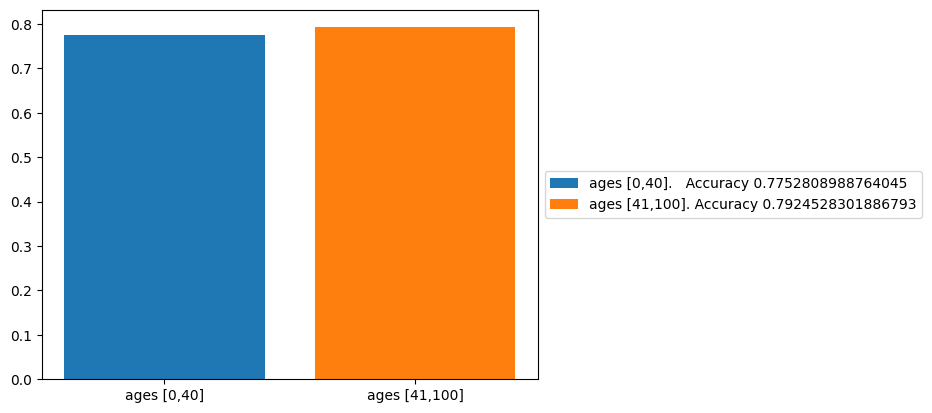

In [10]:
# I will now use the attribute age to select specific data
x_age = x_test[:,7] # If we look at our dataset, age is column [7] (also df['Age'])

x_test0_40 = np.where(x_age < 41) # Attribute values for ages [0,40]
x_test41_100 = np.where(x_age >= 41) # Attribute values for ages [41,100]

y_pred0_40 = y_pred[ x_test0_40  ] # predicted values for ages [0,40]
y_pred41_100 = y_pred[ x_test41_100 ] # predicted values for ages [41,100]

y_test0_40 = y_test[ x_test0_40  ] # test set predicted values for ages [0,40]
y_test41_100 = y_test[ x_test41_100  ] # test set predicted values for ages [41,100]

# I have added _l2 in the name of accuracy to refer to regularization used (I want to refer to this value later)
accuracy_l2_0_40 = accuracy_score(y_test0_40, y_pred0_40) # accuracy for ages [0,40]
accuracy_l2_41_100 = accuracy_score(y_test41_100, y_pred41_100) # accuracy for ages [41,100]

#print(x_age)
#print(x_test0_40 )
#print(x_test41_100)
ages = ["ages [0,40]", "ages [41,100]"] # helpful variable to plot ages
accuracies = [accuracy_l2_0_40, accuracy_l2_41_100] # helpful variable to plot accuracies
print(accuracies)

plt.bar(ages[0], accuracies[0], label = f"ages [0,40].   Accuracy {accuracies[0]}")
plt.bar(ages[1], accuracies[1], label = f"ages [41,100]. Accuracy {accuracies[1]}")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # I used this to show legend out of the plot area
plt.show()

Enter your answer here...

**ANSWER**:<br/>
Splitting the data in such large classes [0,40] and [41,100] does not give that much more information.<br/> Still, we observe that there is slighlty higher accuracy in the age group [41,100]

REPEAT THE PROCESS, BUT THIS TIME PENALTY SHOULD BE:


* l1




In [11]:
regularization = 'l1' # This time we use l1 regularization for the penalty parameter
random_state = 0 # This is the value we use for the random_state parameter. I have used 0 to have the same results every time.
# Should be noted that this seed is only used when solver == ‘sag’, ‘saga’ or ‘liblinear’ to shuffle the data (quoting the page https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

solver = 'liblinear' # for 'l1' regularization, we change to solver 'liblinear' (cannot use 'lbfgs')
max_iter = 150 # The process stops if convergence is achieved, or if it has executed iterations equal to max_iter
classifier = LogisticRegression(penalty = regularization, random_state = random_state, solver = solver, max_iter = max_iter)
# LogisticRegression failed to converge with 'lbfgs' for the default max_iter iterations, so I used a custom value greather than the default

In [12]:
# classifier.fit(...)


# We have defined our classifier (classifier), and our training data (x_train, y_train), so we can finally conduct our fit
classifier.fit(x_train, y_train)

LogisticRegression(max_iter=150, penalty='l1', random_state=0,
                   solver='liblinear')

In [13]:
# y_pred = classifier.predict(...)


# We will now put our model/classifier to the test, by using it to produce results.
# In other words, we make predictions about y, for each value x in the test sample
y_pred = classifier.predict(x_test)

In [14]:
# accuracy = accuracy_score(...)


# For each value that was predicted (y_pred), we compare with the actual value (y_test)
# We use accuracy_score, to calculate the ratio of times where the predicted outcome agrees with the correct outcome (for the test sample)
accuracy_l1 = accuracy_score(y_test, y_pred) # I have added _l1 in the name of accuracy to refer to regularization used (I want to refer to this value later)
print(accuracy_l1)

0.7835497835497836


[0.7808988764044944, 0.7924528301886793]


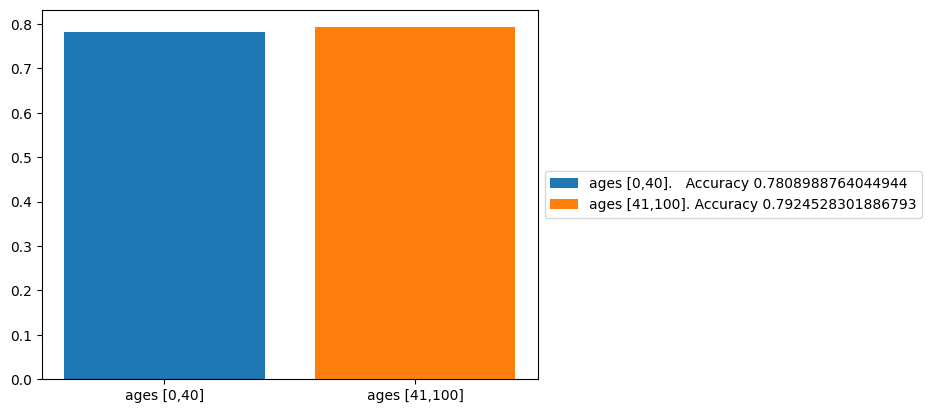

In [15]:
# I will now use the attribute age to select specific data
x_age = x_test[:,7] # If we look at our dataset, age is column [7] (also df['Age'])

x_test0_40 = np.where(x_age < 41) # Attribute values for ages [0,40]
x_test41_100 = np.where(x_age >= 41) # Attribute values for ages [41,100]

y_pred0_40 = y_pred[ x_test0_40  ] # predicted values for ages [0,40]
y_pred41_100 = y_pred[ x_test41_100 ] # predicted values for ages [41,100]

y_test0_40 = y_test[ x_test0_40  ] # test set predicted values for ages [0,40]
y_test41_100 = y_test[ x_test41_100  ] # test set predicted values for ages [41,100]

# I have added _l1 in the name of accuracy to refer to regularization used (I want to refer to this value later)
accuracy_l1_0_40 = accuracy_score(y_test0_40, y_pred0_40) # accuracy for ages [0,40]
accuracy_l1_41_100 = accuracy_score(y_test41_100, y_pred41_100) # accuracy for ages [41,100]

#print(x_age)
#print(x_test0_40 )
#print(x_test41_100)
ages = ["ages [0,40]", "ages [41,100]"] # helpful variable to plot ages
accuracies = [accuracy_l1_0_40, accuracy_l1_41_100] # helpful variable to plot accuracies
print(accuracies)

plt.bar(ages[0], accuracies[0], label = f"ages [0,40].   Accuracy {accuracies[0]}")
plt.bar(ages[1], accuracies[1], label = f"ages [41,100]. Accuracy {accuracies[1]}")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # I used this to show legend out of the plot area
plt.show()

REPEAT THE PROCESS, BUT THIS TIME PENALTY SHOULD BE:

*   None



In [16]:
regularization = None # This time we use No regularization for the penalty parameter
random_state = 0 # This is the value we use for the random_state parameter. I have used 0 to have the same results every time.
# Should be noted that this seed is only used when solver == ‘sag’, ‘saga’ or ‘liblinear’ to shuffle the data (quoting the page https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

solver = 'lbfgs' # for 'l1' regularization, we change to solver 'liblinear' (cannot use 'lbfgs')
max_iter = 150 # The process stops if convergence is achieved, or if it has executed iterations equal to max_iter
classifier = LogisticRegression(penalty = regularization, random_state = random_state, solver = solver, max_iter = max_iter)
# LogisticRegression failed to converge with 'lbfgs' for the default max_iter iterations, so I used a custom value greather than the default

In [17]:
# classifier.fit(...)


# We have defined our classifier (classifier), and our training data (x_train, y_train), so we can finally conduct our fit
classifier.fit(x_train, y_train)

LogisticRegression(max_iter=150, penalty=None, random_state=0)

In [18]:
# y_pred = classifier.predict(...)


# We will now put our model/classifier to the test, by using it to produce results.
# In other words, we make predictions about y, for each value x in the test sample
y_pred = classifier.predict(x_test)

In [19]:
# accuracy = accuracy_score(...)


# For each value that was predicted (y_pred), we compare with the actual value (y_test)
# We use accuracy_score, to calculate the ratio of times where the predicted outcome agrees with the correct outcome (for the test sample)
accuracy_none = accuracy_score(y_test, y_pred) # I have added _none in the name of accuracy to refer to regularization used (I want to refer to this value later)
print(accuracy_none)

0.7792207792207793


[0.7752808988764045, 0.7924528301886793]


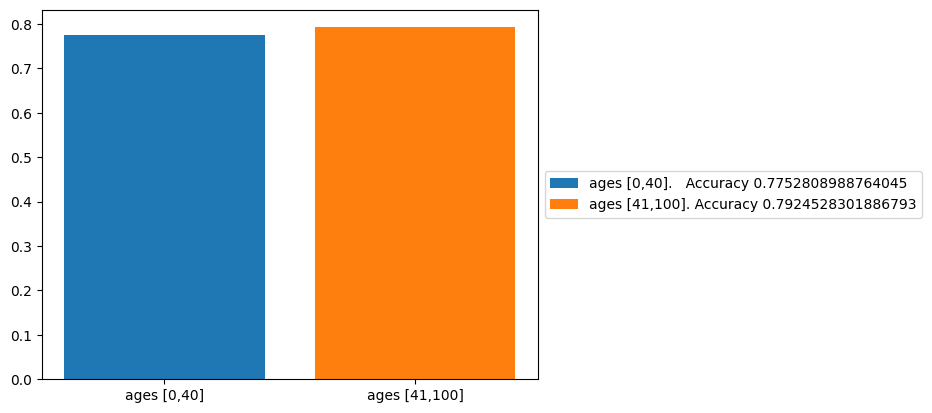

In [20]:
# I will now use the attribute age to select specific data
x_age = x_test[:,7] # If we look at our dataset, age is column [7] (also df['Age'])

x_test0_40 = np.where(x_age < 41) # Attribute values for ages [0,40]
x_test41_100 = np.where(x_age >= 41) # Attribute values for ages [41,100]

y_pred0_40 = y_pred[ x_test0_40  ] # predicted values for ages [0,40]
y_pred41_100 = y_pred[ x_test41_100 ] # predicted values for ages [41,100]

y_test0_40 = y_test[ x_test0_40  ] # test set predicted values for ages [0,40]
y_test41_100 = y_test[ x_test41_100  ] # test set predicted values for ages [41,100]

# I have added _none in the name of accuracy to refer to regularization used (I want to refer to this value later)
accuracy_none_0_40 = accuracy_score(y_test0_40, y_pred0_40) # accuracy for ages [0,40]
accuracy_none_41_100 = accuracy_score(y_test41_100, y_pred41_100) # accuracy for ages [41,100]

#print(x_age)
#print(x_test0_40 )
#print(x_test41_100)
ages = ["ages [0,40]", "ages [41,100]"] # helpful variable to plot ages
accuracies = [accuracy_none_0_40, accuracy_none_41_100] # helpful variable to plot accuracies
print(accuracies)

plt.bar(ages[0], accuracies[0], label = f"ages [0,40].   Accuracy {accuracies[0]}")
plt.bar(ages[1], accuracies[1], label = f"ages [41,100]. Accuracy {accuracies[1]}")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # I used this to show legend out of the plot area
plt.show()

**5. Present a table with the accuracy for each penalty**

In [21]:
# At first, I define all static values (accuracies/penalty types) in variables
cases_all = ["l2", "l1", "none"]
Accuracies_all = [accuracy_l2, accuracy_l1, accuracy_none ]
Accuracies0_40_all = [accuracy_l2_0_40, accuracy_l1_0_40, accuracy_none_0_40 ]
Accuracies41_100_all = [accuracy_l2_41_100, accuracy_l1_41_100, accuracy_none_41_100 ]
print(Accuracies_all)
# Then, I use these variables to create a table using pandas library

pd.set_option("display.precision", 16) # Without this, pandas was only printing 6 decimals
df = pd.DataFrame({'Regularization': cases_all})
df = pd.concat([df, pd.DataFrame({'Accuracy': Accuracies_all})],
               axis=1)
df = pd.concat([df, pd.DataFrame({'Accuracy0_40': Accuracies0_40_all})],
               axis=1)
df = pd.concat([df, pd.DataFrame({'Accuracy41_100': Accuracies41_100_all})],
               axis=1)
df # If for some reason this does not print the table, we could also use print(df)

[0.7792207792207793, 0.7835497835497836, 0.7792207792207793]


,Regularization,Accuracy,Accuracy0_40,Accuracy41_100
0,l2,0.7792207792207793,0.7752808988764045,0.7924528301886793
1,l1,0.7835497835497836,0.7808988764044944,0.7924528301886793
2,none,0.7792207792207793,0.7752808988764045,0.7924528301886793


**Comment on the results:**<br/>
For some reason the cases for l2 regularization and no regularization have given the same accuracy.<br/>
I am not really sure why this happens.<br/>
Also, I notice that the accuracy in age group [41,100] is the same for all 3 penalty cases

# Ex2. Linear Regression

In [22]:
# I needed to import some more stuff for Ex2 (LinearRgression, MAE, SGDRegressor)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import SGDRegressor

# Select Corresponding Features for this task

In [23]:
# We set the features of the exercise as independent (Age, BMI, Pregnancies) and target (BloodPressure) features
input_columns = [
    'Pregnancies',
    'BMI',
    'Age'
]
target_column = 'BloodPressure'

# Split Dataset to x, y

In [24]:
# Here, we load the dataset again, and save it in df
df = pd.read_csv('diabetes.csv')
# We use the previously selected features to create x and y (also, we create x,y as numpy arrays)
x = df[input_columns].to_numpy()
y = df[target_column].to_numpy()

# Split Dataset to Train-Test

In [25]:
# Again, we will split tran-test set into 70-30%, with random_state = 0
random_state = 0 # This is set to 0, as was required in the assignment (this way, we get the same results every time)
test_ratio = 0.3 # In the assignment, we wanted to do a train-test split of 70 train - 30 test
# The command train_test_split of sklearn is used to is used to conduct the dataset split. If I understood corectly, the command split_train_test(...) that was referenced above, is the equivalent one, but in language R
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_ratio, random_state = random_state)

# Compute BloodPressure Predictions

In [26]:
classifier = LinearRegression() # Use sklearn to conduct linear regression for the selected features
classifier.fit(x_train, y_train) # We fit our newly created model, to the train data
y_pred = classifier.predict(x_test) # We make predictions using our model, in the test set

# Measure MAE

In [27]:
# mae <=> Mean Absolute Error
mae_linear = mean_absolute_error(y_test, y_pred) # I have added _linear in the name of mae because I want to use this value later
print(f'For LinearRegression(), our MAE is:\n{mae_linear}')

For LinearRegression(), our MAE is:
10.923279710580168


# Measure mean and std_dev for BloodPressure (Both train set and test set).<br/> Aso plot the two distributions

---



In [28]:
# Here, we calculate the mean and the standard deviation, for the BloodPressure (which is our outcome <=> y), for both the train and the test set
# This is done using numpy commands mean() and std()
y_train_mean = np.mean(y_train)
y_test_mean = np.mean(y_test)
y_train_stddev = np.std(y_train)
y_test_stddev = np.std(y_test)

print(f"for the TRAIN set, for blood pressure: mean = %.16f, std_dev = %.16f" %(y_train_mean, y_train_stddev) )
print(f"for the TEST set, for blood pressure: mean = %.16f, std_dev = %.16f" %(y_test_mean, y_test_stddev) )

for the TRAIN set, for blood pressure: mean = 69.6666666666666714, std_dev = 19.4466913661426268
for the TEST set, for blood pressure: mean = 67.8008658008658074, std_dev = 19.0366290609350166


**Comment on mean and standard deviation:**<br/>
The values for mean and standard deviation differ slightly, for the train and the test set. </br> Since the data was split randomly in train and test set, the difference in these values does not hold any specific meaning.

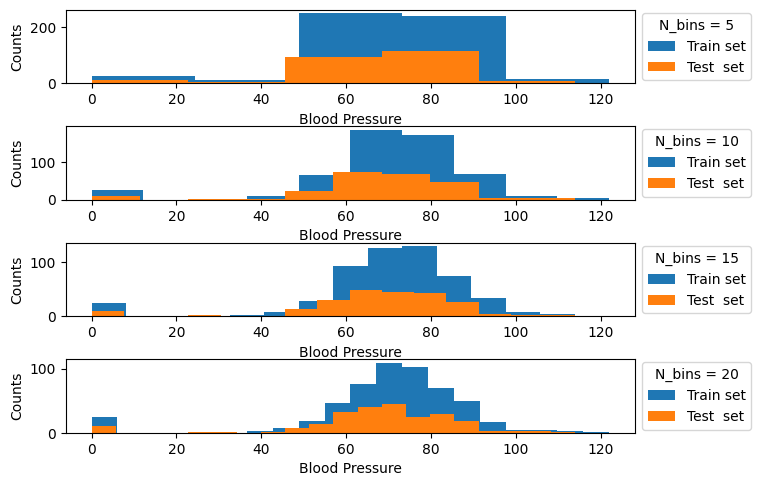

In [29]:
# Below, I plot the histogram for BloodPressure, for both the test set and the train set
# I have tried 4 different values for the count of bins
n_bins = [5, 10, 15, 20]
fig, axs = plt.subplots(4,1) # Make 4 plots in 1 figure (4rows, 1 column)
fig.tight_layout(pad=1.0) # Regulates padding (empty space) between the subplots

# Here, I create the histograms for train and test set for each value of count of bins, and plot it
# I have tried some logic to parametrize the process. Maybe it would be harder, if I was trying to do that in a subplots(2,2)
i=0
while i < len(n_bins):
  axs[i].hist(y_train, bins = n_bins[i], label = 'Train set') # Create BloodPressure histogram for train set
  axs[i].hist(y_test, bins = n_bins[i], label = 'Test  set') # Create BloodPressure histogram for test set
  axs[i].set_xlabel('Blood Pressure') # Set label for x axis
  axs[i].set_ylabel('Counts') # Set label for y axis
  axs[i].legend(title=f'N_bins = {n_bins[i]}',loc='center left', bbox_to_anchor=(1, 0.5)) # I used this to show legend out of the plot area
  i = i + 1

plt.show()

**Comment on the histograms:**<br/>
From the histograms, we can see that the center in the x axis of the test set, is a bit more to the left than the center of the train set. This is also reflected by the difference in the value of the means.<br/>
Other than that, the shape of the distribution is more or less the same, both for the train set and the test set, and reminds me of a Gaussian.

# Now use the Stochastic Gradient Descent method, and compare its accuracy with the previous method (Least squares Linear Regression)

---


**Comment:**<br/>
I will use the MAE metric to compare accuracy.

1.   Penalty = 'l2'

In [30]:
loss = 'squared_error' # The loss function used is the squared error
penalty = 'l2' # We will use l2 regularization
learning_rate = 'constant' # As suggested, we use a constant learning rate scheme.
# According to documentation, for contstant its always eta = eta0
eta0 = 0.01 # We use the suggested value for eta0 (where eta0 is the initial learning rate)
tol = 1e-3 # We use the suggested value for tol (tol is the stopping criterion)

classifier = SGDRegressor(loss = loss, penalty = penalty, learning_rate = learning_rate, eta0 = eta0, tol = tol) # Use sklearn to conduct linear regression for the selected features
classifier.fit(x_train, y_train) # We fit our newly created model, to the train data
y_pred = classifier.predict(x_test) # We make predictions using our model, in the test set

# mae <=> Mean Absolute Error
mae_l2 = mean_absolute_error(y_test, y_pred) # I have added _l2 in the name of mae to refer to regularization used (I want to refer to this value later)
print(mae_l2)

15382285906023.727


2.   Penalty = 'l1'

In [31]:
loss = 'squared_error' # The loss function used is the squared error
penalty = 'l1' # We will use l1 regularization
learning_rate = 'constant' # As suggested, we use a constant learning rate scheme.
# According to documentation, for contstant its always eta = eta0
eta0 = 0.01 # We use the suggested value for eta0 (where eta0 is the initial learning rate)
tol = 1e-3 # We use the suggested value for tol (tol is the stopping criterion)

classifier = SGDRegressor(loss = loss, penalty = penalty, learning_rate = learning_rate, eta0 = eta0, tol = tol ) # Use sklearn to conduct linear regression for the selected features
classifier.fit(x_train, y_train) # We fit our newly created model, to the train data
y_pred = classifier.predict(x_test) # We make predictions using our model, in the test set

# mae <=> Mean Absolute Error
mae_l1 = mean_absolute_error(y_test, y_pred) # I have added _l1 in the name of mae to refer to regularization used (I want to refer to this value later)
print(mae_l1)

32272495077867.586


3.   Penalty = 'elasticnet'

In [32]:
loss = 'squared_error' # The loss function used is the squared error
penalty = 'elasticnet' # We will use elasticnet regularization
learning_rate = 'constant' # As suggested, we use a constant learning rate scheme.
# According to documentation, for contstant its always eta = eta0
eta0 = 0.01 # We use the suggested value for eta0 (where eta0 is the initial learning rate)
tol = 1e-3 # We use the suggested value for tol (tol is the stopping criterion)

classifier = SGDRegressor(loss = loss, penalty = penalty, learning_rate = learning_rate, eta0 = eta0, tol = tol ) # Use sklearn to conduct linear regression for the selected features
classifier.fit(x_train, y_train) # We fit our newly created model, to the train data
y_pred = classifier.predict(x_test) # We make predictions using our model, in the test set

# mae <=> Mean Absolute Error
mae_elasticnet = mean_absolute_error(y_test, y_pred) # I have added _elasticnet in the name of mae to refer to regularization used (I want to refer to this value later)
print(mae_elasticnet)

16420005375287.723


4.   Penalty = None

In [33]:
loss = 'squared_error' # The loss function used is the squared error
penalty = None # We will use no regularization
learning_rate = 'constant' # As suggested, we use a constant learning rate scheme.
# According to documentation, for contstant its always eta = eta0
eta0 = 0.01 # We use the suggested value for eta0 (where eta0 is the initial learning rate)
tol = 1e-3 # We use the suggested value for tol (tol is the stopping criterion)

classifier = SGDRegressor(loss = loss, penalty = penalty, learning_rate = learning_rate, eta0 = eta0, tol = tol ) # Use sklearn to conduct linear regression for the selected features
classifier.fit(x_train, y_train) # We fit our newly created model, to the train data
y_pred = classifier.predict(x_test) # We make predictions using our model, in the test set

# mae <=> Mean Absolute Error
mae_none = mean_absolute_error(y_test, y_pred) # I have added _none in the name of mae to refer to regularization used (I want to refer to this value later)
print(mae_none)

15511237489658.688


In [34]:
# At first, I define all static values (penalty types/MAEs) in variables
cases_all = ["l2", "l1", "elasticnet", "none"]
mae_all = [mae_l2, mae_l1, mae_elasticnet, mae_none ]

pd.set_option("display.precision", 16) # Without this, pandas was only printing with 6 decimals
# Then, I use these variables to create a table using pandas library
df = pd.DataFrame({'Regularization': cases_all})
df = pd.concat([df, pd.DataFrame({'MAE': mae_all})],
               axis=1)
df # If for some reason this does not print the table, we could also use plot(df)

,Regularization,MAE
0,l2,1.5382285906023727e+13
1,l1,3.2272495077867586e+13
2,elasticnet,1.6420005375287723e+13
3,none,1.5511237489658688e+13


**Comment about results:**<br/>
By looking at the MAEs, we understand that the SGD method has diverged for all cases of regularization.<br/>
We will now try again, with different learning rate.<br/>
We will keep learning_rate = 'constant', but try a smaller value of eta0.

1.   Penalty = 'l2'

In [35]:
loss = 'squared_error' # The loss function used is the squared error
penalty = 'l2' # We will use l2 regularization
learning_rate = 'constant' # As suggested, we use a constant learning rate scheme.
# According to documentation, for contstant its always eta = eta0
eta0 = 0.0000001 # We use a smaller value for eta0 (where eta0 is the initial learning rate)
tol = 1e-3 # We use the suggested value for tol (tol is the stopping criterion)

classifier = SGDRegressor(loss = loss, penalty = penalty, learning_rate = learning_rate, eta0 = eta0, tol = tol ) # Use sklearn to conduct linear regression for the selected features
classifier.fit(x_train, y_train) # We fit our newly created model, to the train data
y_pred = classifier.predict(x_test) # We make predictions using our model, in the test set

# mae <=> Mean Absolute Error
mae_l2 = mean_absolute_error(y_test, y_pred) # I have added _l2 in the name of mae to refer to regularization used (I want to refer to this value later)
print(mae_l2)

12.55661417506811


2.   Penalty = 'l1'

In [36]:
loss = 'squared_error' # The loss function used is the squared error
penalty = 'l1' # We will use l1 regularization
learning_rate = 'constant' # As suggested, we use a constant learning rate scheme.
# According to documentation, for contstant its always eta = eta0
eta0 = 0.0000001 # We use a smaller value for eta0 (where eta0 is the initial learning rate)
tol = 1e-3 # We use the suggested value for tol (tol is the stopping criterion)

classifier = SGDRegressor(loss = loss, penalty = penalty, learning_rate = learning_rate, eta0 = eta0, tol = tol ) # Use sklearn to conduct linear regression for the selected features
classifier.fit(x_train, y_train) # We fit our newly created model, to the train data
y_pred = classifier.predict(x_test) # We make predictions using our model, in the test set

# mae <=> Mean Absolute Error
mae_l1 = mean_absolute_error(y_test, y_pred) # I have added _l1 in the name of mae to refer to regularization used (I want to refer to this value later)
print(mae_l1)

12.569065976388341


3.   Penalty = 'elasticnet'

In [37]:
loss = 'squared_error' # The loss function used is the squared error
penalty = 'elasticnet' # We will use elasticnet regularization
learning_rate = 'constant' # As suggested, we use a constant learning rate scheme.
# According to documentation, for contstant its always eta = eta0
eta0 = 0.0000001 # We use a smaller value for eta0 (where eta0 is the initial learning rate)
tol = 1e-3 # We use the suggested value for tol (tol is the stopping criterion)

classifier = SGDRegressor(loss = loss, penalty = penalty, learning_rate = learning_rate, eta0 = eta0, tol = tol ) # Use sklearn to conduct linear regression for the selected features
classifier.fit(x_train, y_train) # We fit our newly created model, to the train data
y_pred = classifier.predict(x_test) # We make predictions using our model, in the test set

# mae <=> Mean Absolute Error
mae_elasticnet = mean_absolute_error(y_test, y_pred) # I have added _elasticnet in the name of mae to refer to regularization used (I want to refer to this value later)
print(mae_elasticnet)

12.566838053844993


4.   Penalty = None

In [38]:
loss = 'squared_error' # The loss function used is the squared error
penalty = None # We will use no regularization
learning_rate = 'constant' # As suggested, we use a constant learning rate scheme.
# According to documentation, for contstant its always eta = eta0
eta0 = 0.0000001 # We use a smaller value for eta0 (where eta0 is the initial learning rate)
tol = 1e-3 # We use the suggested value for tol (tol is the stopping criterion)

classifier = SGDRegressor(loss = loss, penalty = penalty, learning_rate = learning_rate, eta0 = eta0, tol = tol ) # Use sklearn to conduct linear regression for the selected features
classifier.fit(x_train, y_train) # We fit our newly created model, to the train data
y_pred = classifier.predict(x_test) # We make predictions using our model, in the test set

# mae <=> Mean Absolute Error
mae_none = mean_absolute_error(y_test, y_pred) # I have added _none in the name of mae to refer to regularization used (I want to refer to this value later)
print(mae_none)

12.563654005395522


In [39]:
# At first, I define all static values (penalty types/MAEs) in variables
cases_all = ["l2", "l1", "elasticnet", "none"]
mae_all = [mae_l2, mae_l1, mae_elasticnet, mae_none ]


pd.set_option("display.precision", 16) # Without this, pandas was only printing with 6 decimals
# Then, I use these variables to create a table using pandas library
df = pd.DataFrame({'Regularization': cases_all})
df = pd.concat([df, pd.DataFrame({'MAE': mae_all})],
               axis=1)
df # If for some reason this does not print the table, we could also use plot(df)

,Regularization,MAE
0,l2,12.5566141750681108
1,l1,12.5690659763883410
2,elasticnet,12.5668380538449931
3,none,12.5636540053955219


In [40]:
# We also print the value of the MAE of the linear regression again, for comparison
print(f'MAE of the linear Regression: \n {mae_linear}')
print(f'MAE of the SGD Regression: [regularization0, ..., regularizationN] -> [MAE_for_regularization0, ..., MAE_for_regularizationN]  \n{cases_all} -> {mae_all}')

MAE of the linear Regression: 
 10.923279710580168
MAE of the SGD Regression: [regularization0, ..., regularizationN] -> [MAE_for_regularization0, ..., MAE_for_regularizationN]  
['l2', 'l1', 'elasticnet', 'none'] -> [12.55661417506811, 12.569065976388341, 12.566838053844993, 12.563654005395522]


**Comment on the value of Mean Absolute Error for each case:**<br/>
The mean absolute error is more or less the same for the SGD regression, regardless of regularization method.</br>
The mean absolute error for the linear regression model is less than the mean absolute error for stochastic gradient descent method.
Not sure if that is something that happens in this perticular case because of the specific relationship between our X and Y, or if that is always the case.